# Experiment Containers and Sessions

In [1]:
# use cam_cache.py to demo downloading experiments by cre line, area, and imaging depth

# Filtering cells

In [2]:
# find some orientation-tuned cells

# NWB Download

In [3]:
# use cam_cache.py to download NWB files for a list of experiments

# Drifting Gratings Stimulus Table

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

def plot_stimulus_table(stim_table, title):
    fstart = stim_table.start.min()
    fend = stim_table.end.max()
    
    fig = plt.figure(figsize=(15,1))
    ax = fig.gca()
    for i, trial in stim_table.iterrows():    
        x1 = float(trial.start - fstart) / (fend - fstart)
        x2 = float(trial.end - fstart) / (fend - fstart)            
        ax.add_patch(patches.Rectangle((x1, 0.0), x2 - x1, 1.0, color='r'))
    ax.set_xticks((0,1))
    ax.set_xticklabels((fstart, fend))
    ax.set_yticks(())
    ax.set_title(title)
    ax.set_xlabel("frames")

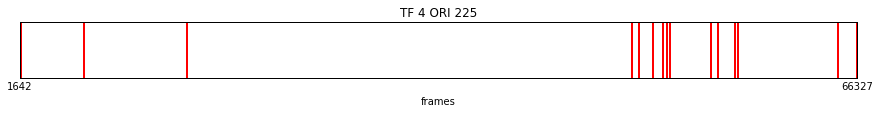

In [5]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/501940850.nwb")

# this is a pandas DataFrame. find trials with a given stimulus condition.
temporal_frequency = 4
orientation = 225
stim_table = data_set.get_drifting_gratings_stimulus_table()
stim_table = stim_table[(stim_table.temporal_frequency == temporal_frequency) & (stim_table.orientation == orientation)]

# plot the trials
plot_stimulus_table(stim_table, "TF %d ORI %d" % (temporal_frequency, orientation))

# Static Gratings Stimulus Table

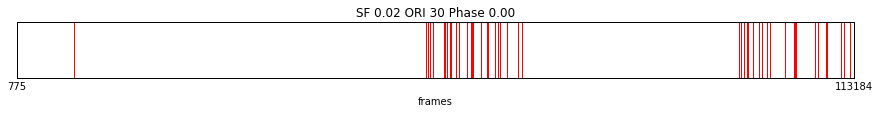

In [6]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/501498760.nwb")

# this is a pandas DataFrame. find trials with a given stimulus condition.
spatial_frequency = 0.02
orientation = 30
phase = 0.0
stim_table = data_set.get_static_gratings_stimulus_table()
stim_table = stim_table[(stim_table.spatial_frequency == spatial_frequency) & \
                        (stim_table.orientation == orientation) & \
                        (stim_table.phase == phase) ]

# plot the trials
plot_stimulus_table(stim_table, "SF %.02f ORI %d Phase %.02f" % (spatial_frequency, orientation, phase))

# Natural Scenes Stimulus Table

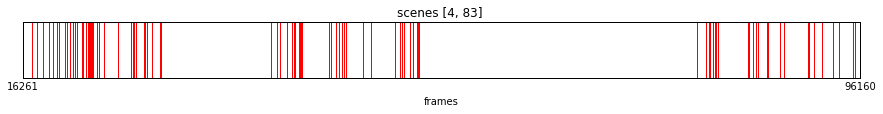

In [7]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/501498760.nwb")

# this is a pandas DataFrame. find trials with a given stimulus condition.
scenes = [4, 83]
stim_table = data_set.get_natural_scenes_stimulus_table()
trial_mask = stim_table.frame == -2
for scene in scenes:
    trial_mask |= (stim_table.frame == scene)
stim_table = stim_table[trial_mask]

# plot the trials
plot_stimulus_table(stim_table, "scenes %s " % scenes)

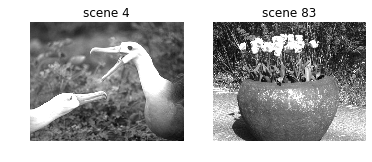

In [8]:
fig, axes = plt.subplots(1,len(scenes))
template = data_set.get_stimulus_template('natural_scenes')
for ax,scene in zip(axes, scenes):
    ax.imshow(template[scene,:,:], cmap='gray')
    ax.set_axis_off()
    ax.set_title('scene %d' % scene)

# Natural Movie Stimulus Table

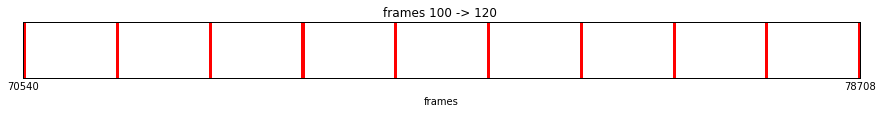

In [9]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/501498760.nwb")

# this is a pandas DataFrame. find trials with a given stimulus condition.
frame_range = [ 100, 120 ]
stim_table = data_set.get_natural_movie_stimulus_table('natural_movie_one')
stim_table = stim_table[(stim_table.frame >= frame_range[0]) & (stim_table.frame <= frame_range[1])]

plot_stimulus_table(stim_table, "frames %d -> %d " % (frame_range[0], frame_range[1]))

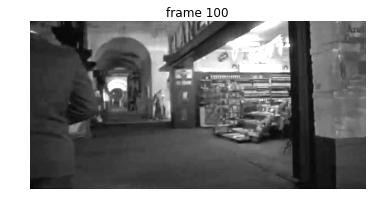

In [10]:
template = data_set.get_stimulus_template('natural_movie_one')
plt.imshow(template[frame_range[0],:,:], cmap='gray')
plt.axis('off')
plt.title('frame %d' % frame_range[0])

# Locally Sparse Noise Stimulus Table

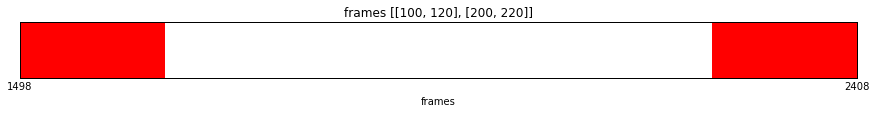

In [11]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/505693621.nwb")

# this is a pandas DataFrame. find trials with a given stimulus condition.
frame_ranges = [ [ 100, 120 ], [ 200, 220 ] ]
stim_table = data_set.get_locally_sparse_noise_stimulus_table()
trial_mask = stim_table.frame == -2
for frame_range in frame_ranges:
    trial_mask |= (stim_table.frame >= frame_range[0]) & (stim_table.frame <= frame_range[1])
stim_table = stim_table[trial_mask]

plot_stimulus_table(stim_table, "frames %s" % str(frame_ranges))

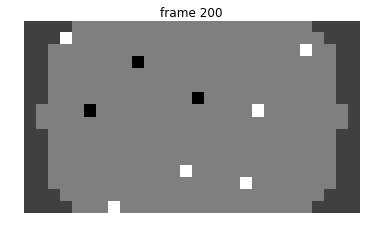

In [12]:
template, mask = data_set.get_locally_sparse_noise_stimulus_template(mask_off_screen=True)
plt.imshow(template[frame_range[0],:,:], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('frame %d' % frame_range[0])

# ROI Masks

In [13]:
%load_ext autoreload
%autoreload 2

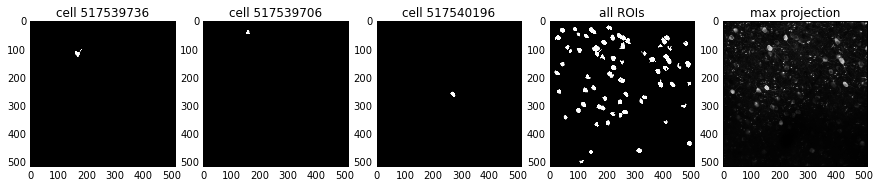

In [14]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data_set = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/510221121.nwb")

# TODO: find some cells that are interesting
cids = data_set.get_cell_specimen_ids()[:15:5]

# get masks for specific cells
roi_mask_list = data_set.get_roi_mask(cell_specimen_ids=cids)

# plot each mask
f, axes = plt.subplots(1, len(cids)+2, figsize=(15, 3))
for ax, roi_mask, cid in zip(axes[:-2], roi_mask_list, cids):
    ax.imshow(roi_mask.get_mask_plane(), cmap='gray')
    ax.set_title('cell %d' % cid)

# make a mask of all ROIs in the experiment    
all_roi_masks = data_set.get_roi_mask()
sum_mask = np.zeros(CamNwbDataSet.MOVIE_FOV_PX)
for roi_mask in all_roi_masks:
    sum_mask[roi_mask.get_mask_plane()>0] = 1

axes[-2].imshow(sum_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# show the movie max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

# ROI Analysis

# Neuropil Subtraction

In [15]:
from allensdk.core.cam_nwb_data_set import CamNwbDataSet

# load the cell and neuropil traces
f = CamNwbDataSet("/data/informatics/CAM/june_dashboard/nwb/510221121.nwb")

time, roi_traces = f.get_fluorescence_traces()
_, neuropil_traces = f.get_neuropil_traces()

In [16]:
from allensdk.cam.r_neuropil import estimate_contamination_ratios

results = estimate_contamination_ratios(roi_traces[0], neuropil_traces[0])

print("r = %f" % results['r'])
print("error = %f" % results['err'])

r = 0.542121
error = 0.013060
